### Background dist 

NOTE: This notebook must be placed in the root folder alongside a `NGSIM-Data` folder which contains the `data.csv` file.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("NGSIM-Data/data.csv")

In [3]:
df.shape

(457997, 24)

In [4]:
df = df[df["Direction"] == 4]

In [5]:
df.shape

(253994, 24)

In [6]:
df_south_pass_thru = df[(df["Org_Zone"] == 114) & (df["Dest_Zone"] == 201) ]

In [7]:
df_south_pass_thru.head()

,Vehicle_ID,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
8684,29,154,1144,1163045700,9.805,2113.030,2230788.997,1377572.912,3.5,6.5,...,114,201,0,6,4,1,0,13,0.0,0.0
8685,29,155,1144,1163045800,9.892,2113.016,2230789.085,1377572.923,3.5,6.5,...,114,201,0,6,4,1,0,13,0.0,0.0
8686,29,156,1144,1163045900,0.623,1936.173,2230810.364,1377396.167,3.5,6.5,...,114,201,0,5,4,1,0,13,0.0,0.0
8687,29,157,1144,1163046000,0.249,1933.383,2230810.381,1377393.352,3.5,6.5,...,114,201,0,5,4,1,0,13,0.0,0.0
8688,29,158,1144,1163046100,-0.112,1930.590,2230810.398,1377390.538,3.5,6.5,...,114,201,0,5,4,1,0,13,0.0,0.0


In [8]:
total_frames_per_vehicle = df_south_pass_thru.groupby('Vehicle_ID')["Tot_Frames"].mean()

epoch_min_per_vehicle = df_south_pass_thru.groupby('Vehicle_ID')["Epoch_ms"].min()
epoch_max_per_vehicle = df_south_pass_thru.groupby('Vehicle_ID')["Epoch_ms"].max()

In [9]:
av_time = total_frames_per_vehicle.mean() * .1

In [10]:
av_time

133.96712328767123

In [11]:
time_elapsed = (epoch_max_per_vehicle - epoch_min_per_vehicle).mean() / 1000

In [12]:
time_elapsed

133.86712328767123

In [13]:
enter_times = epoch_min_per_vehicle.values
enter_times.sort()

difference = np.diff(enter_times)
difference = (difference / 1000)

In [14]:
difference = pd.Series(difference)

In [15]:
difference

0     34.5
1      2.9
2      9.9
3      7.1
4      6.2
5      2.2
6      1.0
7      9.9
8      5.2
9      3.3
10    69.0
11     4.4
12     3.3
13    16.7
14     6.6
15    64.7
16     2.8
17     0.0
18     3.8
19     2.6
20     4.2
21     2.8
22     2.8
23     1.5
24     3.5
25     0.5
26     7.9
27     2.2
28    70.6
29    13.3
      ... 
42     8.1
43    63.1
44     8.6
45     2.3
46     5.6
47     4.5
48     1.8
49     2.7
50     6.0
51     8.2
52    67.4
53     7.8
54     2.1
55     6.2
56     5.7
57     2.3
58    74.2
59     4.6
60     2.8
61     1.7
62     8.1
63     1.9
64     3.8
65     2.3
66    78.0
67     4.2
68     4.3
69     3.2
70    10.1
71     1.1
Length: 72, dtype: float64

In [16]:
# bins = sqrt(n)

difference.plot.hist(grid=True, bins=9, rwidth=0.9, color='#607c8e')

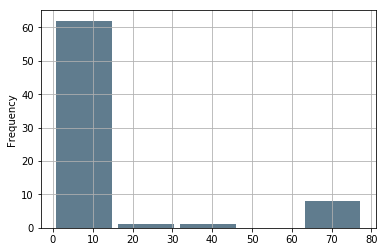

In [17]:
# bins = (2n) ^ 1/3 = 5
difference.plot.hist(grid=True, bins=5, rwidth=0.9, color='#607c8e')


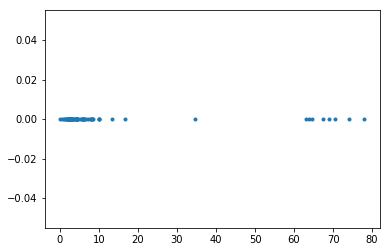

In [18]:
import matplotlib.pyplot as plot

d = difference.values

plot.plot(d, np.zeros_like(d), '.')
plot.show()

## Fit Gamma

In [19]:
import scipy.stats as ss
import scipy as sp

d = d[d != 0]

fit_alpha, fit_loc, fit_beta = ss.gamma.fit(d)

In [20]:
fit_alpha

0.5968164961690746

In [21]:
fit_loc

0.4999999999999999

In [22]:
fit_beta

20.643597997380056

## Fit Dist

Try out gamma, exponential, normal, and lognorm dists

In [23]:
import fitdist
import importlib

In [100]:
importlib.reload(fitdist)

<module 'fitdist' from '/Users/willepp/Documents/Class/CX 4230/Project2/ComputerSimProject2/fitdist.py'>

In [101]:
dist = fitdist.Distribution()

In [102]:
dist.Fit(d)

Trying  norm
D value for norm is 0.38805234296940283
Trying  lognorm
D value for lognorm is 0.13609897929085613
Trying  expon
D value for expon is 0.31046452848224826
Trying  gamma
D value for gamma is 0.2458256715549728
Resulting distributions:  [('norm', 3.891151299687967e-10), ('lognorm', 0.13122539357539256), ('expon', 1.4114010554332358e-06), ('gamma', 0.00028989507896281646)]


('lognorm', 0.13122539357539256)

In [27]:
dist.getDist()

Dist:  <scipy.stats._continuous_distns.lognorm_gen object at 0x12229b7b8>
Param:  (1.235172097023483, 0.37297021138469266, 4.820377381126887)


In [28]:
rands = dist.Random()

### Histogram 

For fitted lognormal plot with 

- shapes = 1.235172097023483
- loc = 0.37297021138469266
- scale = 4.820377381126887

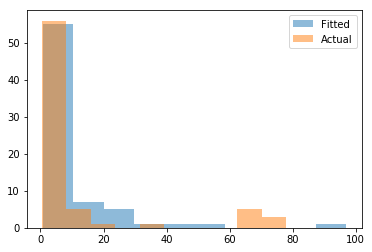

In [29]:
dist.Plot(d)

In [30]:
# Sample
r = dist.Random()
r[0]

20.014818850789922

### Fit actual dist

In [31]:
n = len(d)
log_dist = sp.stats.lognorm

In [32]:
rand = log_dist.rvs(1.235172097023483, loc=0.37297021138469266, scale=4.820377381126887, size=1)[0]

In [33]:
rand

2.91843667991498

In [34]:
d

array([34.5,  2.9,  9.9,  7.1,  6.2,  2.2,  1. ,  9.9,  5.2,  3.3, 69. ,
        4.4,  3.3, 16.7,  6.6, 64.7,  2.8,  3.8,  2.6,  4.2,  2.8,  2.8,
        1.5,  3.5,  0.5,  7.9,  2.2, 70.6, 13.3,  5.8,  4.4,  4.4, 63.8,
        6.1,  3. ,  2.5,  1.6,  2.4,  5.7,  2.1,  5.9,  8.1, 63.1,  8.6,
        2.3,  5.6,  4.5,  1.8,  2.7,  6. ,  8.2, 67.4,  7.8,  2.1,  6.2,
        5.7,  2.3, 74.2,  4.6,  2.8,  1.7,  8.1,  1.9,  3.8,  2.3, 78. ,
        4.2,  4.3,  3.2, 10.1,  1.1])

### Emp dist for lane changes

In [35]:
df.head()

,Vehicle_ID,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
1680,6,5,31,1163030800,-2.673,2072.566,2230786.882,1377530.554,19.1,6.5,...,114,213,5,0,4,2,0,0,0.0,0.0
1681,6,6,31,1163030900,-2.226,2070.553,2230787.631,1377528.633,19.1,6.5,...,114,213,5,0,4,2,0,0,0.0,0.0
1682,6,7,31,1163031000,-1.294,2068.028,2230788.939,1377526.280,19.1,6.5,...,114,213,5,0,4,2,0,0,0.0,0.0
1683,6,8,31,1163031100,-0.861,2065.515,2230789.751,1377523.863,19.1,6.5,...,114,213,5,0,4,2,0,0,0.0,0.0
1684,6,9,31,1163031200,0.557,2063.026,2230791.533,1377521.621,19.1,6.5,...,114,213,5,0,4,2,0,0,0.0,0.0


In [36]:
df['Direction'].unique()

array([4])

In [37]:
south_bound_veh_ids = df['Vehicle_ID'].unique()

In [38]:
changes = []
for id_n in south_bound_veh_ids:
    this_car_s = df_south_pass_thru[df_south_pass_thru['Vehicle_ID'] == id_n]['Lane_ID']
    
    #delt = []
    cur_lane = None
    for i, lane in this_car_s.iteritems():
        if cur_lane is None:
            cur_lane = lane
        
        if cur_lane != lane:
            changes.append(lane - cur_lane)
            cur_lane = lane
        else:
            changes.append(0)
    
    #changes.append(delt)


In [39]:
changes = pd.Series(changes)

In [40]:
changes[changes < 0] = -1
changes[changes > 0] = 1

In [41]:
vc = changes.value_counts()

In [42]:
right_change = vc[1] / len(changes)
left_change = vc[-1] / len(changes)
straight = vc[0] / len(changes)

print('Straight prob: ', straight)
print('Left Lane change prob: ', left_change)
print('Right Lane change prob: ', right_change)

Straight prob:  0.9920035176341865
Left Lane change prob:  0.003977789821357357
Right Lane change prob:  0.004018692544456147


### Entering on 11th street

In [43]:
d_eleven = [2.2,  5.7, 73.1,  9.6,  8.1, 10.2, 38.2, 82.1, 37.9, 21.1, 31.7,
       18.7, 13.1,  3.1, 10.9,  2.3, 21.4,  9.5,  8.4,  4.2, 46.3,  7.7,
        3.4,  7.1, 12.6,  3.3,  8.1, 40.6, 62.5,  7.3,  4.8,  2.3, 81.6,
        4.5, 41.6,  4.7, 23.6,  5.7,  5.8,  5.8, 62.1, 25.9,  2.6]

In [44]:
dist_elev = fitdist.Distribution()

dist_elev.Fit(d_eleven)

Trying  norm
Trying  lognorm
Trying  expon
Trying  gamma
Resulting distributions:  [('norm', 0.0054436275416987695), ('lognorm', 0.9536637212972272), ('expon', 0.04797003537567874), ('gamma', 0.20098044348224264)]


('lognorm', 0.9536637212972272)

In [45]:
dist_elev.getDist()

Dist:  <scipy.stats._continuous_distns.lognorm_gen object at 0x12229b7b8>
Param:  (1.5234191072345973, 1.9716462121837928, 7.605110207945611)


In [46]:
log_dist_elev = sp.stats.lognorm

In [98]:
log_dist_elev.rvs(1.5234191072345973, loc=1.9716462121837928, scale=7.605110207945611, size=1)[0]

2.466332918019128

In [99]:
dist_elev.Random()

array([10.3125348])